In [225]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numba
from mpl_toolkits.mplot3d import Axes3D

In [226]:
L = 250
N = 100
x = np.arange(-int(L/2), int(L/2), 1)
y = np.arange(-int(L/2), int(L/2), 1)
delta_theta = np.zeros(N)
v = 0.3

##x represents coordinates, v has the components of the velocity (probably superfluous, psi is the orientation, omega is the 
##angular velocity and r is the radius.
particles_x = np.zeros([N, 2])
particles_v = np.zeros([N, 2])
particles_psi = np.zeros(N)
particles_omega = np.zeros(N)
particles_r = np.zeros(N)

In [227]:
for i in range (int(np.sqrt(N))):
    particles_x[10*i:10*(i+1), 0] = np.arange(0, 10)
    particles_x[10*i:10*(i+1), 1] = i
    
particles_r[:] = np.random.normal(1, 0.1, N)
particles_psi = particles_psi - delta_theta
particles_v[:, 0] = v*np.cos(particles_psi)
particles_v[:, 0] = v*np.sin(particles_psi)

In [228]:
def calcDTheta (N, particles_x, selectMatrix):
    particles_dist = particles_x[None, :, :] - particles_x[:, None, :]
    
    for i in range (N):
        particles_dist[i, i, :] = 100

    ##normally, atan return a value between -pi/2 and pi/2. atan2 returns a value between pi and -pi.
    
    angles = selectMatrix*np.arctan2(particles_dist[:, :, 1], particles_dist[:, :, 0])

def update(N, L, particles_x, particles_r, particles_psi):
    F_x = np.zeros(N)
    F_y = np.zeros(N)
    
    dx = np.zeros(N)
    dy = np.zeros(N)
    
    v = 0.3
    
    theta_out = np.zeros(N)
    theta_in = np.zeros(N)
    d_theta = np.zeros(N)
    
    particles_omega = (v)/particles_r
    
    psi_diff = np.zeros([N, N])
    psi_diff = particles_psi[None, :] - particles_psi[:, None]
    
    ##distances and angles calculations
    d = np.linalg.norm(particles_x[None, :, :] - particles_x[:, None, :], axis = 2)
    
    selectMatrix = np.copy(d)
    selectMatrix[selectMatrix > 2.7] = 0
    selectMatrix[selectMatrix > 0] = 1 ##the selection matrix is used to only take into account the neighbours with d < 2.7
    
    psi_diff = psi_diff * select_matrix
    
    angles = calcDTheta(N, particles_x, selectMatrix)
    
    ##NEEDS OPTIMIZATION
    for i in range (N):
        M = max(angles[i, :])
        m = min(angles[i, :])
        if M > 0 and m < 0:
            if M - m < np.pi:
                theta_in[i] = (M-m)/2
                theta_out[:] = 2*np.pi - 2*theta_in
                d_theta = particles_psi - theta_in
        elif (M > 0 and m > 0) or (M < 0 and m < 0):
            theta_in[i] = (M-m)/2
            theta_out[:] = 2*np.pi - 2*theta_in
            d_theta = particles_psi - theta_in
    
    ##OPTIMIZATION NEEDED
    for i in range (0, N):
        for j in range (0, N):
            d[i, j] -= particles_r[i] + particles_r[j]
    d[d<0] = 0
    
    ##distances along different axes
    dx = d*np.cos(angles[:])
    dy = d*np.sin(angles[:])
    
    ##force calculations
    F_x[:] = v*np.cos(particles_psi[:]) + (theta_out[:] - np.pi)*theta_out[:]*np.piecewise(theta_out[:] -np.pi, [theta_out[:] -np.pi > 0], [0, 1])*np.cos(particles_psi[:]) + 0.1*np.sum(dx, axis = 1)[:]
    F_y[:] = v*np.sin(particles_psi[:]) + (theta_out[:] - np.pi)*theta_out[:]*np.piecewise(theta_out[:] -np.pi, [theta_out[:] -np.pi > 0], [0, 1])*np.sin(particles_psi[:]) + 0.1*np.sum(dy, axis = 1)[:]
    
    T = particles_omega[:]*np.piecewise(theta_out[:] -np.pi, [theta_out[:] -np.pi > 0], [0, 1]) + 1*np.random.uniform(-1,1, N) + 1*np.sum(psi_diff, axis = 1)[:]
    
    particles_x[:, 0] = np.mod(particles_x[:, 0] + F_x[:], L)
    particles_x[:, 1] = np.mod(particles_x[:, 1] + F_y[:], L)
    particles_omega[:] = - (particles_psi[:] - T*1)
    particles_psi[:] = particles_psi[:] + particles_omega[:]
    
    return particles_x, particles_psi

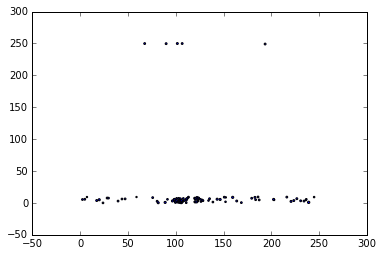

In [242]:
plt.scatter(particles_x[:, 0], particles_x[:, 1], s = np.pi*particles_r[:]**2)
plt.show()

In [241]:
particles_x, particles_psi = update(N, L, particles_x, particles_r, particles_psi)

[[[  1.00000000e+02   1.00000000e+02]
  [  8.05776987e+01  -2.49571236e+02]
  [  4.37360802e+01   2.04403653e-01]
  ..., 
  [  1.08450739e+02  -2.41145964e+02]
  [ -2.17218363e+01  -2.40736310e+02]
  [  1.08761103e+02  -2.40457731e+02]]

 [[ -8.05776987e+01   2.49571236e+02]
  [  1.00000000e+02   1.00000000e+02]
  [ -3.68416185e+01   2.49775640e+02]
  ..., 
  [  2.78730407e+01   8.42527250e+00]
  [ -1.02299535e+02   8.83492600e+00]
  [  2.81834041e+01   9.11350546e+00]]

 [[ -4.37360802e+01  -2.04403653e-01]
  [  3.68416185e+01  -2.49775640e+02]
  [  1.00000000e+02   1.00000000e+02]
  ..., 
  [  6.47146592e+01  -2.41350367e+02]
  [ -6.54579165e+01  -2.40940714e+02]
  [  6.50250226e+01  -2.40662134e+02]]

 ..., 
 [[ -1.08450739e+02   2.41145964e+02]
  [ -2.78730407e+01  -8.42527250e+00]
  [ -6.47146592e+01   2.41350367e+02]
  ..., 
  [  1.00000000e+02   1.00000000e+02]
  [ -1.30172576e+02   4.09653503e-01]
  [  3.10363372e-01   6.88232963e-01]]

 [[  2.17218363e+01   2.40736310e+02]
  [